In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
files=pd.read_table("clusterlists.dat", header=None)
files

,0
0,Clustersi1000000.dat
1,Clustersi100000.dat
2,Clustersi10000.dat
3,Clustersi1000.dat
4,Clustersi100.dat
5,Clustersi2000000.dat
6,Clustersi3000000.dat
7,Clustersi4000000.dat
8,Clustersi5000000.dat
9,Clustersi6000000.dat


In [3]:
data={}
for i, file in enumerate(files[0]):
    data[str(file)]=np.loadtxt(str(file))
datafr=pd.DataFrame.from_dict(data, orient='index')
datafr=datafr.transpose()
datafr=datafr.rename(columns={'Clustersi1000000.dat':'1000000',
              'Clustersi100000.dat':'100000',
              'Clustersi10000.dat':'10000',
              'Clustersi1000.dat':'1000',
              'Clustersi100.dat':'100',
              'Clustersi2000000.dat':'2000000',
              'Clustersi3000000.dat':'3000000',
              'Clustersi4000000.dat':'4000000',
              'Clustersi5000000.dat': '5000000',
              'Clustersi6000000.dat': '6000000',
              'Clustersi7000000.dat': '7000000',
              'Clustersi8000000.dat': '8000000',
              'Clustersi9000000.dat':'9000000'})
datafr=datafr.sort_index(axis=1)

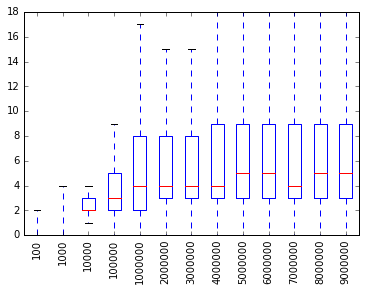

In [4]:
datafr.plot.box(showfliers=False, rot=90)
#plt.xticks(x, labels, rotation='vertical')

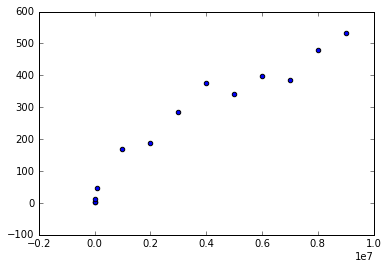

In [5]:
maxes=datafr.max(axis=0).tolist()
list=datafr.columns.values.tolist()
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.scatter(list, maxes)
#ax.set_xscale('log')

[('100', 7755), ('1000', 6934), ('10000', 3931), ('100000', 1856), ('1000000', 1039), ('2000000', 920), ('3000000', 882), ('4000000', 827), ('5000000', 802), ('6000000', 770), ('7000000', 763), ('8000000', 737), ('9000000', 727)]


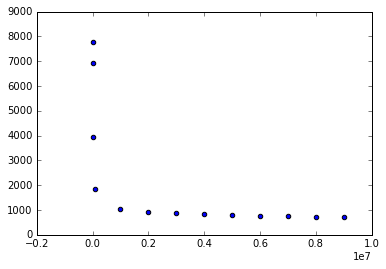

In [10]:
cluster_number=[]
for column in list:
    cluster_number.append(datafr[column].notnull().sum())

plt.scatter(list, cluster_number)
print zip(list, cluster_number)